In [119]:
# Predition using DeepLearning (Classification)

import tensorflow as tf
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [120]:
# load the dataset diabates_ds
diabetes_df = pd.read_csv('diabetes_ds.csv')
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [121]:
# indentiy records with NAN, Null, NA, Inf
print(diabetes_df.isna().sum())
print("---------------------------------")
print(diabetes_df.isnull().sum())




gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
---------------------------------
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [122]:
# convert 'gender' column to binary as 1: Male 0:Female, Other = -1
diabetes_df['gender'] = diabetes_df['gender'].map({'Male': 1, 'Female': 0, 'Other' : -1})

# identify all distinct value for column 'smoking_history'
print(diabetes_df['smoking_history'].unique())

# map this '' to respective numeric value as 1: never 2:No Info 3:current etc
diabetes_df['smoking_history'] = diabetes_df['smoking_history'].map({
    'never': 0,'No Info': -1,'current': 1,'former': 2,'ever': 3,'not current': 4
})


['never' 'No Info' 'current' 'former' 'ever' 'not current']


18
41430
58552


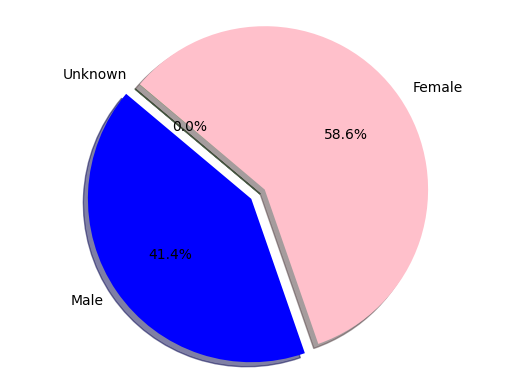

In [123]:
# set a var ctr = and set no of records founf with gender = -1\
recWithUnknownGender = len(diabetes_df[diabetes_df['gender'] == -1])
print(recWithUnknownGender)

maleCount = len(diabetes_df[diabetes_df['gender'] == 1])
print(maleCount)

femaleCount = len(diabetes_df[diabetes_df['gender'] == 0])
print(femaleCount)

#create bar chart with Male, Female, Unknown
labels = ['Male', 'Female', 'Unknown']
sizes = [maleCount, femaleCount, recWithUnknownGender]
colors = ['blue', 'pink', 'green']
explode = (0.1, 0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

















In [124]:
# convert Gender, Age to Int value from float
diabetes_df['gender'] = diabetes_df['gender'].astype(int)
diabetes_df['age'] = diabetes_df['age'].astype(int)


diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25.19,6.6,140,0
1,0,54,0,0,-1,27.32,6.6,80,0
2,1,28,0,0,0,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


In [125]:
# get x,y from the ds
X = diabetes_df.drop('diabetes', axis=1)
y = diabetes_df['diabetes']


In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
N, D = X_train.shape
print(N, D) # train and test row count


60000 8


In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(len(X_train))
print(len(X_test))
print("---------")
print(len(diabetes_df))

60000
40000
---------
100000


In [128]:

# Example model

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers. Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8930 - loss: 0.2595 - val_accuracy: 0.9605 - val_loss: 0.1129
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9577 - loss: 0.1243 - val_accuracy: 0.9636 - val_loss: 0.1024
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9630 - loss: 0.1105 - val_accuracy: 0.9669 - val_loss: 0.0965
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9645 - loss: 0.1036 - val_accuracy: 0.9698 - val_loss: 0.0898
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9682 - loss: 0.0973 - val_accuracy: 0.9712 - val_loss: 0.0868
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9684 - loss: 0.0948 - val_accuracy: 0.9713 - val_loss: 0.0851
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9695 - loss: 0.0922 - val_accuracy: 0.9715 - val_loss: 0.0838
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9695 - loss: 0.0911 - 

In [143]:
# save the model
model.save('dl_modelDiabetesPrediction.h5')


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9718 - loss: 0.0815
[0.0824742242693901, 0.9717166423797607]
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9715 - loss: 0.0826
[0.08270060271024704, 0.9717000126838684]
---------------------------------
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9715 - loss: 0.0826


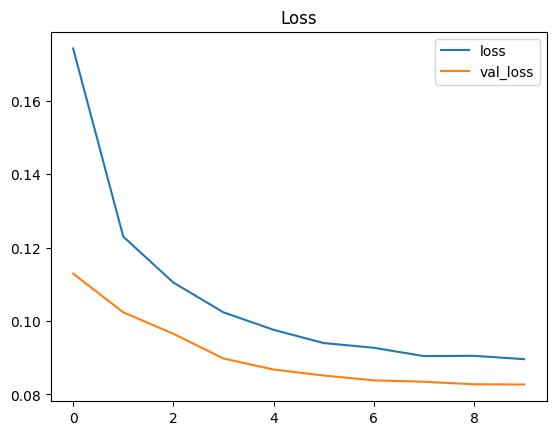

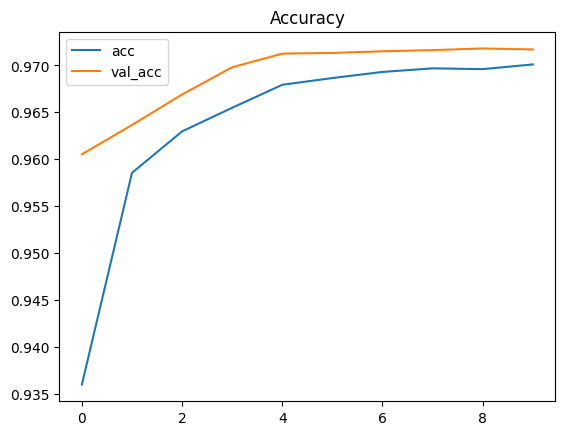

In [129]:
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))
print("---------------------------------")

model.evaluate(X_test, y_test)

plt.title('Loss')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.title('Accuracy')
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()



In [149]:
# run inference on Test Data for prediction
# load the saved model
model = tf.keras.models.load_model('dl_modelDiabetesPrediction.h5')

testData = [
    # [0,	80,	0,	1,	-1,	25.19,	6.6,	140] # -0 : correct
    # [0,	44,	0,	0,	-1,	19.31,	6.5,	200] #  1 : wrong
    # [1,	53,	0,	0,	 1,	30.8,	  6.6,	280] #	1 : correct
    # [0,	57,	0,	0,	 1,	22.43,	6.6,	90]  #  0 : correct
      [0,	61,	0,	0,	 1,	30.11,	6.2,	240] #	1 : correct
]


In [150]:
# Real prediction with the model created earlier

# Scale the test data once before prediction
testData_scaled = scaler.transform(testData)

predictions = model.predict(testData_scaled)

print("\nPrediction---------")
# print Is Diabetic = Yes when value is 1, No when 0
print("Is Diabetic = 'Yes'" if predictions[0][0] > 0.5 else "Is Diabetic = 'No'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step

Prediction---------
Is Diabetic = 'Yes'


In [151]:
# loop the dataset 'diabetes_df' for randomn 10 records
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

ctr = 100
import random
random_numbers = random.sample(range(1000, 12000), ctr)
# loop it
total_wrongPrediction = 0
for index, value in enumerate(random_numbers):
    dsToTest = diabetes_df.iloc[value]
    isDiabetic_Actual = "'Yes'" if dsToTest['diabetes']  == 1 else "'No'"

    # drop the target col
    dsToTest = dsToTest.drop('diabetes')
    dsToTest = dsToTest.to_numpy()
    dsToTest = dsToTest.reshape(1, -1)
    # print(dsToTest) # Uncomment for debugging

    # Scale the data point before prediction
    dsToTest_scaled = scaler.transform(dsToTest)

    predictions = model.predict(dsToTest_scaled)

    print("\nPrediction---------")
    predictedVal = "'Yes'" if predictions[0][0] > 0.5 else "'No'"

    # print Is Diabetic = Yes when value is 1, No when 0
    print("Actual=", isDiabetic_Actual, ", Predicted =", predictedVal)

    if isDiabetic_Actual != predictedVal:
        total_wrongPrediction += 1

print(f"\n\nTotal wrong prediction # {total_wrongPrediction} out of {ctr}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Prediction---------
Actual= 'No' , Predicted = 'No'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Prediction---------
Actual= 'Yes' , Predicted = 'No'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Prediction---------
Actual= 'Yes' , Predicted = 'Yes'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Prediction---------
Actual= 'No' , Predicted = 'No'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Prediction---------
Actual= 'No' , Predicted = 'No'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Prediction---------
Actual= 'No' , Predicted = 'No'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Prediction---------
Actual= 'No' , Predicted = 'No'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Prediction---------
Actual= 'No' , Predicted = 'No'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Prediction---------
Actual= 'No' , Predicted = 'No'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Prediction---------
Actual= 'No' , Predicted = 'No'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Prediction---------
Actual= 'No' , Predicted = '